In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()

<IPython.core.display.Javascript object>

# Load and prepare data

In [3]:
df_train_data = pd.read_csv("shuttle_data/shuttle.tst", sep=" ", header=None)

<IPython.core.display.Javascript object>

In [4]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


<IPython.core.display.Javascript object>

In [5]:
df_train_data[9].value_counts()

1    11478
4     2155
5      809
3       39
2       13
6        4
7        2
Name: 9, dtype: int64

<IPython.core.display.Javascript object>

In [6]:
df_train_data["class"] = 1
df_train_data.loc[df_train_data[9] != 4, "class"] = 0

<IPython.core.display.Javascript object>

In [7]:
X = df_train_data.drop(columns=[9, "class"])
X

,0,1,2,3,4,5,6,7,8
0,55,0,81,0,-6,11,25,88,64
1,56,0,96,0,52,-4,40,44,4
2,50,-1,89,-7,50,0,39,40,2
3,53,9,79,0,42,-2,25,37,12
4,55,2,82,0,54,-6,26,28,2
...,...,...,...,...,...,...,...,...,...
14495,80,0,84,0,-36,-29,4,120,116
14496,55,0,81,0,-20,25,26,102,76
14497,55,0,77,0,12,-22,22,65,42
14498,37,0,103,0,18,-16,66,85,20


<IPython.core.display.Javascript object>

In [8]:
y = df_train_data["class"]
y.value_counts()

0    12345
1     2155
Name: class, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# y = df_train_data[9]
# y["clas] = 0
# y.loc[y[9] != 1, "class"] = 1
# y = y.drop(columns=9)
# y = np.ravel(y)
# y.shape
# # 0 is majority class, 1 is the classing in the remaining 20%

<IPython.core.display.Javascript object>

In [10]:
# np.bincount(y)

<IPython.core.display.Javascript object>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<IPython.core.display.Javascript object>

In [12]:
X_train

,0,1,2,3,4,5,6,7,8
2939,37,0,82,0,12,7,45,69,24
11759,37,0,78,0,24,17,41,55,14
11198,45,0,82,0,44,-7,37,38,2
6227,37,0,90,0,34,25,53,57,4
4958,53,1,87,0,52,-1,34,35,2
...,...,...,...,...,...,...,...,...,...
7080,37,0,80,0,10,12,43,70,26
13327,55,0,78,0,16,-1,23,63,40
218,45,0,83,6,44,-5,38,39,2
14400,51,0,78,-1,52,6,27,26,0


<IPython.core.display.Javascript object>

# Create the Model

In [13]:
# scaler = StandardScaler()

# X_train_scaled = pd.DataFrame(
#     scaler.fit(X_train), index=X_train.index, columns=X_train.columns
# )

# X_test_scaled = pd.DataFrame(
#     scaler.fit(X_test), index=X_test.index, columns=X_test.columns
# )

<IPython.core.display.Javascript object>

In [14]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

# Calculate Accuracy

In [15]:
print(
    "The train accuracy of this model fit is {}".format(model.score(X_train, y_train))
)

print("The train accuracy of this model fit is {}".format(model.score(X_test, y_test)))

The train accuracy of this model fit is 0.821551724137931
The train accuracy of this model fit is 0.8337931034482758


<IPython.core.display.Javascript object>

# Dummy Classifier

In [16]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

<IPython.core.display.Javascript object>

In [17]:
print(
    "The dummy accuracy of this model fit is {}".format(dummy_clf.score(X_test, y_test))
)

The dummy accuracy of this model fit is 0.86


<IPython.core.display.Javascript object>

With our model only being about 15% better than the lazy guessing of the dummy classifier, we likely have more room to increase our accuracy. 

# Confusion Matrix

In [18]:
y_pred = model.predict(X_test)
lr_cm = confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

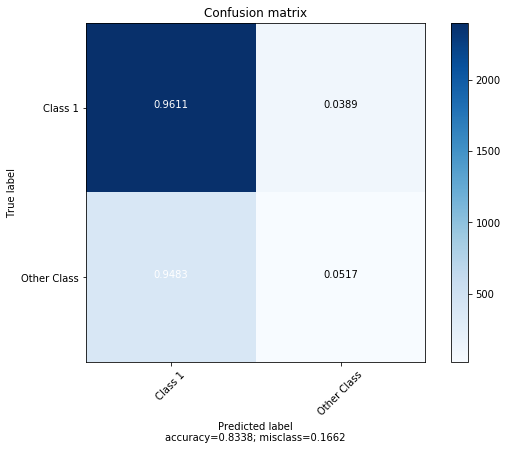

<IPython.core.display.Javascript object>

In [19]:
plot_confusion_matrix(lr_cm, target_names=["Class 1", "Other Class"])

# Metrics

* F1
* F Beta
* Precision
* Recall
* Accuracy

In [20]:
# tp, fp, tn, fn = lr_cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fbeta_precision = fbeta_score(y_test, y_pred, 0.5)
fbeta_recall = fbeta_score(y_test, y_pred, 2)

<IPython.core.display.Javascript object>

In [21]:
print("Accuracy score: {:.2f}".format(accuracy))
print("Precision score: {:.2f}".format(precision))
print("Recall score: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Fbeta score favoring precision: {:.2f}".format(fbeta_precision))
print("FBeta score favoring recall: {:.2f}".format(fbeta_recall))

Accuracy score: 0.83
Precision score: 0.18
Recall score: 0.05
F1 score: 0.08
Fbeta score favoring precision: 0.12
FBeta score favoring recall: 0.06


<IPython.core.display.Javascript object>

# Classification Report

In [22]:
report = classification_report(y_test, y_pred, target_names=["maj_class", "min_class"])
print(report)

              precision    recall  f1-score   support

   maj_class       0.86      0.96      0.91      2494
   min_class       0.18      0.05      0.08       406

    accuracy                           0.83      2900
   macro avg       0.52      0.51      0.49      2900
weighted avg       0.77      0.83      0.79      2900



<IPython.core.display.Javascript object>

# ROC and AUC

In [23]:
y_test_df = pd.DataFrame(y_test)

<IPython.core.display.Javascript object>

In [24]:
y_probs = model.predict_proba(X_test)[:, 1]

<IPython.core.display.Javascript object>

In [25]:
# y_probs = y_probs.flatten()
# y_test = y_test.flatten()

<IPython.core.display.Javascript object>

In [26]:
y_probs

array([0.09565295, 0.21271867, 0.04482473, ..., 0.06422852, 0.12392787,
       0.28290041])

<IPython.core.display.Javascript object>

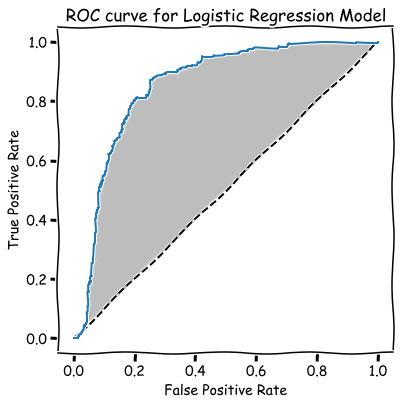

Area under the ROC curve: 0.855


<IPython.core.display.Javascript object>

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

with plt.xkcd():
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr)
    plt.fill(fpr, tpr, "grey", alpha=0.3)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve for Logistic Regression Model")
    plt.show()

auc = roc_auc_score(y_test, y_probs)
print("Area under the ROC curve: {:.3f}".format(auc))

# Precision-Recall Curve

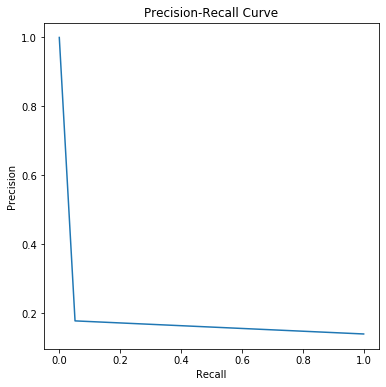

<IPython.core.display.Javascript object>

In [28]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# Cross Validation

In [29]:
clf = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Accuracy scores for the 5 folds: ", cv_scores)
print("Mean cross validation score: {:.3f}".format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.81681034 0.81724138 0.81982759 0.82198276 0.83232759]
Mean cross validation score: 0.822


<IPython.core.display.Javascript object>

# KNN Trial

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)

# Then  fit the model
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)

print("Accuracy of KNN (k = 7): {:.3f}".format(knn_7_score))

Accuracy of KNN (k = 7): 0.999


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K nearest neighbors is giving much better accuracy! 

# Random Forest

In [35]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)

forest_score = forest.score(X_test, y_test)

print("Accuracy of Random Forest: {:.3f}".format(forest_score))

Accuracy of Random Forest: 1.000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>